<img src="https://camo.githubusercontent.com/cc5541fa8bc6f822cb8d5b4261a23f20ec8321f4/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393438362d34373138653338362d343665632d313165382d396663332d3532353061343965663537302e706e67">

---

# 5- Using camera to create a dataset of images

Import necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

Modify a little bit out camera code, to save frames marked as `TYPE_1` if `1` is pressed, and frames marked as `TYPE_2` if `2` is pressed.

_⚠️It's recommendable take at least 10 pictures of each type!_

In [12]:
# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500
raw_prasiddha_type_2 = []
#raw_prasiddha_type_2 = []
#raw_sourabh_type_3 = []

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (100, 100), (500, 430), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1000)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    for i in range(10):
        print('1 key pressed - saved TYPE_2 frame')
        raw_prasiddha_type_2.append(frame)
#     elif key & 0xFF == ord("1"):
#         # save the frame
#         raw_devkul_type_1.append(frame)
#         print('1 key pressed - saved TYPE_1 frame')
        
#     elif key & 0xFF == ord("2"):
#         # save the frame
#         raw_prasiddha_type_2.append(frame)
#         print('2 key pressed - Saved TYPE_2 frame')
#     elif key & 0xFF == ord("3"):
#         # save the frame
#         raw_sourav_type_3.append(frame)
#         print('3 key pressed - Saved TYPE_3 frame')

camera.release()
cv2.destroyAllWindows()

1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - save

1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - save

1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - saved TYPE_2 frame
1 key pressed - save

In [15]:
#print("Devkul Images",len(raw_devkul_type_1))
#print("Prasiddha Images:",len(raw_prasiddha_type_2))
print("Sourav Images:", len(raw_prasiddha_type_2))

Sourav Images: 640


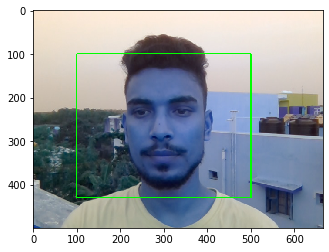

In [16]:
plt.imshow(raw_devkul_type_1[100])

Now crop ROI from the frames, resize it to `224*224` and persist them to `data/images_type_1` and `data/images_type_2` folders.

In [11]:
for i, frame in enumerate(raw_prasiddha_type_2):
    # get ROI
    roi = frame[100+2:430-2, 100+2:500-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize to 224*224
    roi = cv2.resize(roi, (224, 224))
    
    # persist the image
    cv2.imwrite('./data/prasiddha/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

# for i, frame in enumerate(raw_sourabh_type_3):
#     # get ROI
#     roi = frame[75+2:425-2, 300+2:650-2]
    
#     # parse BRG to RGB
#     roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

#     # resize to 224*224
#     roi = cv2.resize(roi, (224, 224))
    
#     # persist the image
#     cv2.imwrite('./data/sourabh/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

Take a look at `data/images_type_1` and `data/images_type_2` folder to see if images were saved correctly.

<img src="https://camo.githubusercontent.com/53f6fb6ccefefd87dc93af20b8e7972573de9828/68747470733a2f2f757365722d696d616765732e67697468756275736572636f6e74656e742e636f6d2f373036353430312f33393131393531382d35396661353163652d343665632d313165382d383530332d3566383133363535386632622e706e67">
<a href="https://rmotr.com" target="_blank">rmotr.com</a>